<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Linear Regression Multiple Outputs</h1> 


<h2>Table of Contents</h2>

<ul>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function the PyTorch way</a></li>
    <li><a href="#BGD">Train the Model: Batch Gradient Descent</a></li>
</ul>
<hr>


<h2>Preparation</h2>


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(1)

In [3]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05),
                       np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection = '3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label = 'y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

<h2 id=" #Makeup_Data" > Make Some Data </h2>


In [4]:
# Create 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [5]:
# Create the dataset object

data_set = Data2D()

<h2 id="Model_Cost">Create the Model, Optimizer, and Total Loss Function (Cost)</h2>


In [6]:
# Create a customized linear

class LR(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
# Create the linear regression model w/ 2d input and 1d output

model = LR(2,1)

# print the parameters
print('Parameters:', list(model.parameters()))

Parameters: [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


Create an optimizer  object. Set the learning rate to 0.1. <b>Don't forget to enter the model parameters in the constructor.</b>


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.2paramater_hate.png" width="100" alt="How the optimizer works">


In [8]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr = 0.1)

Create the criterion function that calculates the total loss or cost:


In [9]:
# Create the cost function

criterion = nn.MSELoss()

Create a data loader object. Set the batch_size equal to 2: 


In [10]:
# Create the data loader

train_loader = DataLoader(dataset = data_set, batch_size = 2)

<h2 id="BGD">Train the Model via Mini-Batch Gradient Descent</h2>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost:


Before Training:


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


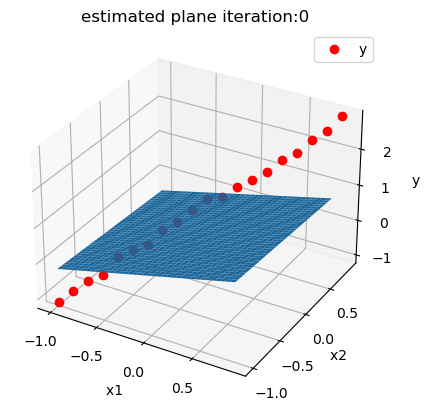

After Training:


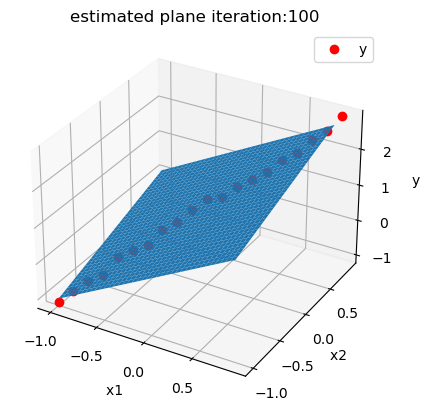

In [11]:
# Train the model

LOSS = []
print('Before Training:')
Plot_2D_Plane(model, data_set)
epochs = 100
   
def train_model(epochs):
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

train_model(epochs)
print('After Training:')
Plot_2D_Plane(model, data_set, epochs)

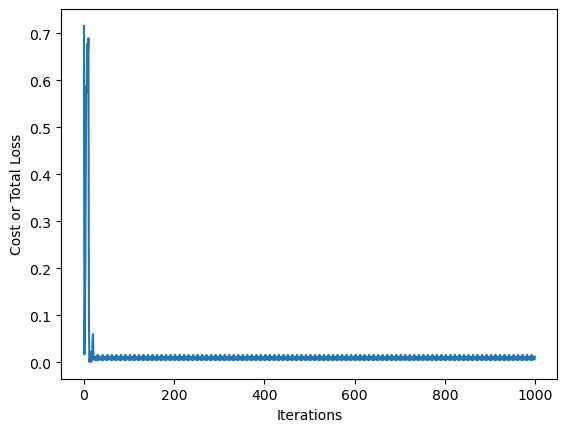

In [13]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations")
plt.ylabel("Cost or Total Loss")
plt.show()

<h3>Practice</h3>


Create a new <code>model1</code>. Train the model with a batch size 30 and learning rate 0.1, store the loss or total cost in a list <code>LOSS1</code>, and plot the results.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


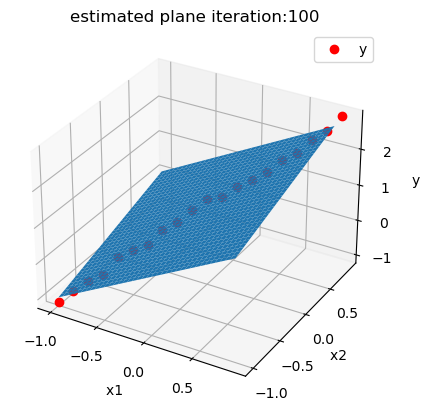

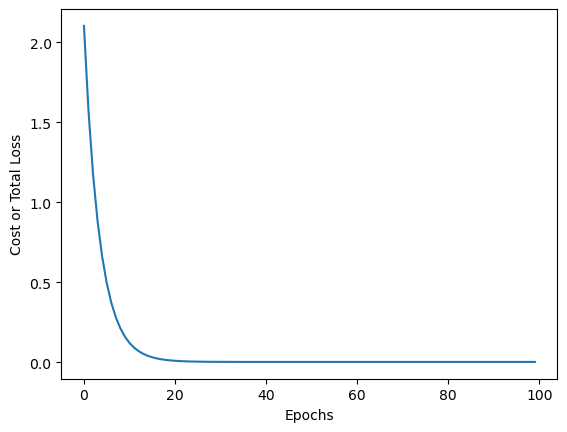

In [15]:
# Practice create model1

model1 = LR(2,1)
dset = Data2D()

# Train the model with batch size 30 and learning rate 0.1, store the loss in a list LOSS1. 
loader_train = DataLoader(dataset = dset, batch_size = 30)
optimizer1 = optim.SGD(model1.parameters(), lr = 0.1)
LOSS1 = []
epochs = 100
   
def train_model1(epochs):
    for epoch in range(epochs):
        for x,y in loader_train:
            yhat = model1(x)
            loss = criterion(yhat, y)
            LOSS1.append(loss.item())
            optimizer1.zero_grad()
            loss.backward()
            optimizer1.step()

train_model1(epochs)
Plot_2D_Plane(model1, dset, epochs)

# Plot the results
plt.plot(LOSS1)
plt.xlabel('Epochs')
plt.ylabel('Cost or Total Loss')
plt.show()

Use the following validation data to calculate the total loss or cost for both models:


In [17]:
torch.manual_seed(2)

validation_data = Data2D()
Y = validation_data.y
X = validation_data.x

print('Cost of model:', criterion(model(X),Y))
print('Cost of model1:',criterion(model1(X),Y))


Cost of model: tensor(0.0081, grad_fn=<MseLossBackward0>)
Cost of model1: tensor(0.0080, grad_fn=<MseLossBackward0>)
